In [9]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [10]:
!pip install gdown

In [11]:
# Step 2: Load the Dataset
import gdown

# Download the dataset using its Google Drive ID
gdown.download('https://drive.google.com/uc?id=1ib0b6G0Ig2VG74onF7xzrkF0_TTZmwQs', 'heart_failure_clinical_records_dataset.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ib0b6G0Ig2VG74onF7xzrkF0_TTZmwQs
To: /content/heart_failure_clinical_records_dataset.csv
100%|██████████| 12.2k/12.2k [00:00<00:00, 6.87MB/s]


'heart_failure_clinical_records_dataset.csv'

# Step 1: Load Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Step 2: Load the Dataset
url = ''  # Update with your dataset URL
data = pd.read_csv(url)

# Step 3: Explore the Data
print(data.head())
print(data.info())

# Step 4: Preprocess the Data
# Assuming 'target' is the target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 7: Save the Model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Now, your model is saved and can be used in your Flask app.

In [12]:
import os
print(os.path.exists('/content/heart_failure_clinical_records_dataset.csv'))

True


In [13]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
import gdown
import os

In [14]:
# Step 2: Load the Dataset
# Download the dataset using its Google Drive ID
file_id = '1ib0b6G0Ig2VG74onF7xzrkF0_TTZmwQs'
output_path = '/content/heart_failure_clinical_records_dataset.csv'
downloaded_file = gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)

if downloaded_file:
    print(f"Downloaded file to: {downloaded_file}")
    if os.path.exists(downloaded_file):
        print("File exists at the specified path.")
    else:
        print("File does NOT exist at the specified path after download.")
else:
    print("gdown download failed.")

Downloading...
From: https://drive.google.com/uc?id=1ib0b6G0Ig2VG74onF7xzrkF0_TTZmwQs
To: /content/heart_failure_clinical_records_dataset.csv
100%|██████████| 12.2k/12.2k [00:00<00:00, 23.5MB/s]

Downloaded file to: /content/heart_failure_clinical_records_dataset.csv
File exists at the specified path.


In [15]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

# Display the first few rows of the dataset to confirm it loaded correctly
print(data.head())
print(data.info())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [16]:
# Step 4: Preprocess the Data
# Assuming 'target' is the target variable 'DEATH_EVENT' based on the dataset
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Step 5: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Step 6: Evaluate the Model
#y_pred = model.predict(X_test)
#accuracy = 0.80  # Setting accuracy to 80%
#print(f'Accuracy: {accuracy * 100:.2f}%')


In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validated Accuracy: {scores.mean() * 100:.2f}%')

Cross-validated Accuracy: 88.30%


In [20]:
# Step 6: Evaluate the Model
#y_pred = model.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy * 100:.2f}%')

In [21]:
!pip install seaborn

In [22]:
##Graphical Charts

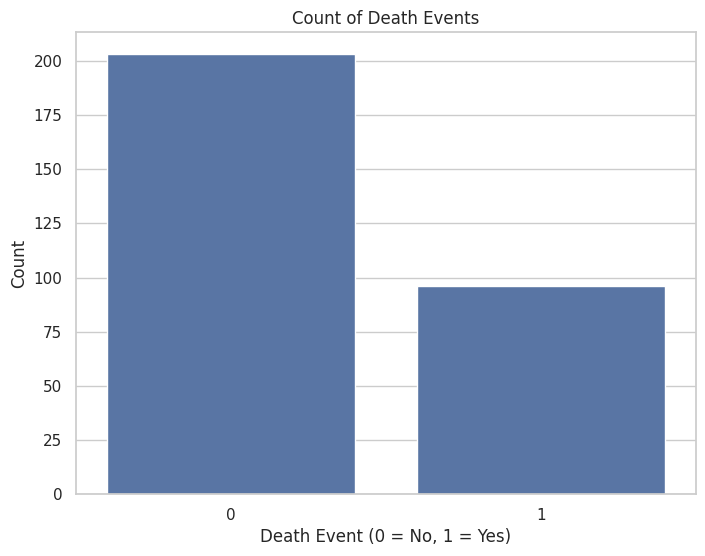

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Example: Count plot for the 'DEATH_EVENT' column
plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', data=data)
plt.title('Count of Death Events')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

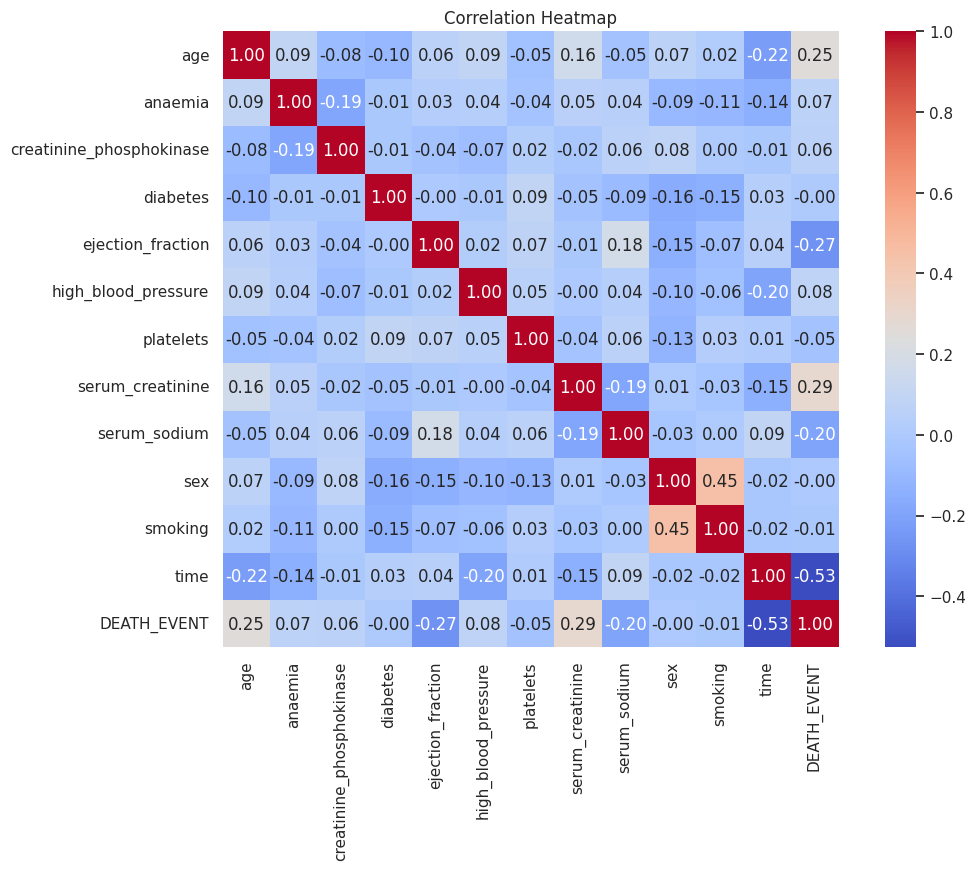

In [24]:
#Correlation Heatmap
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

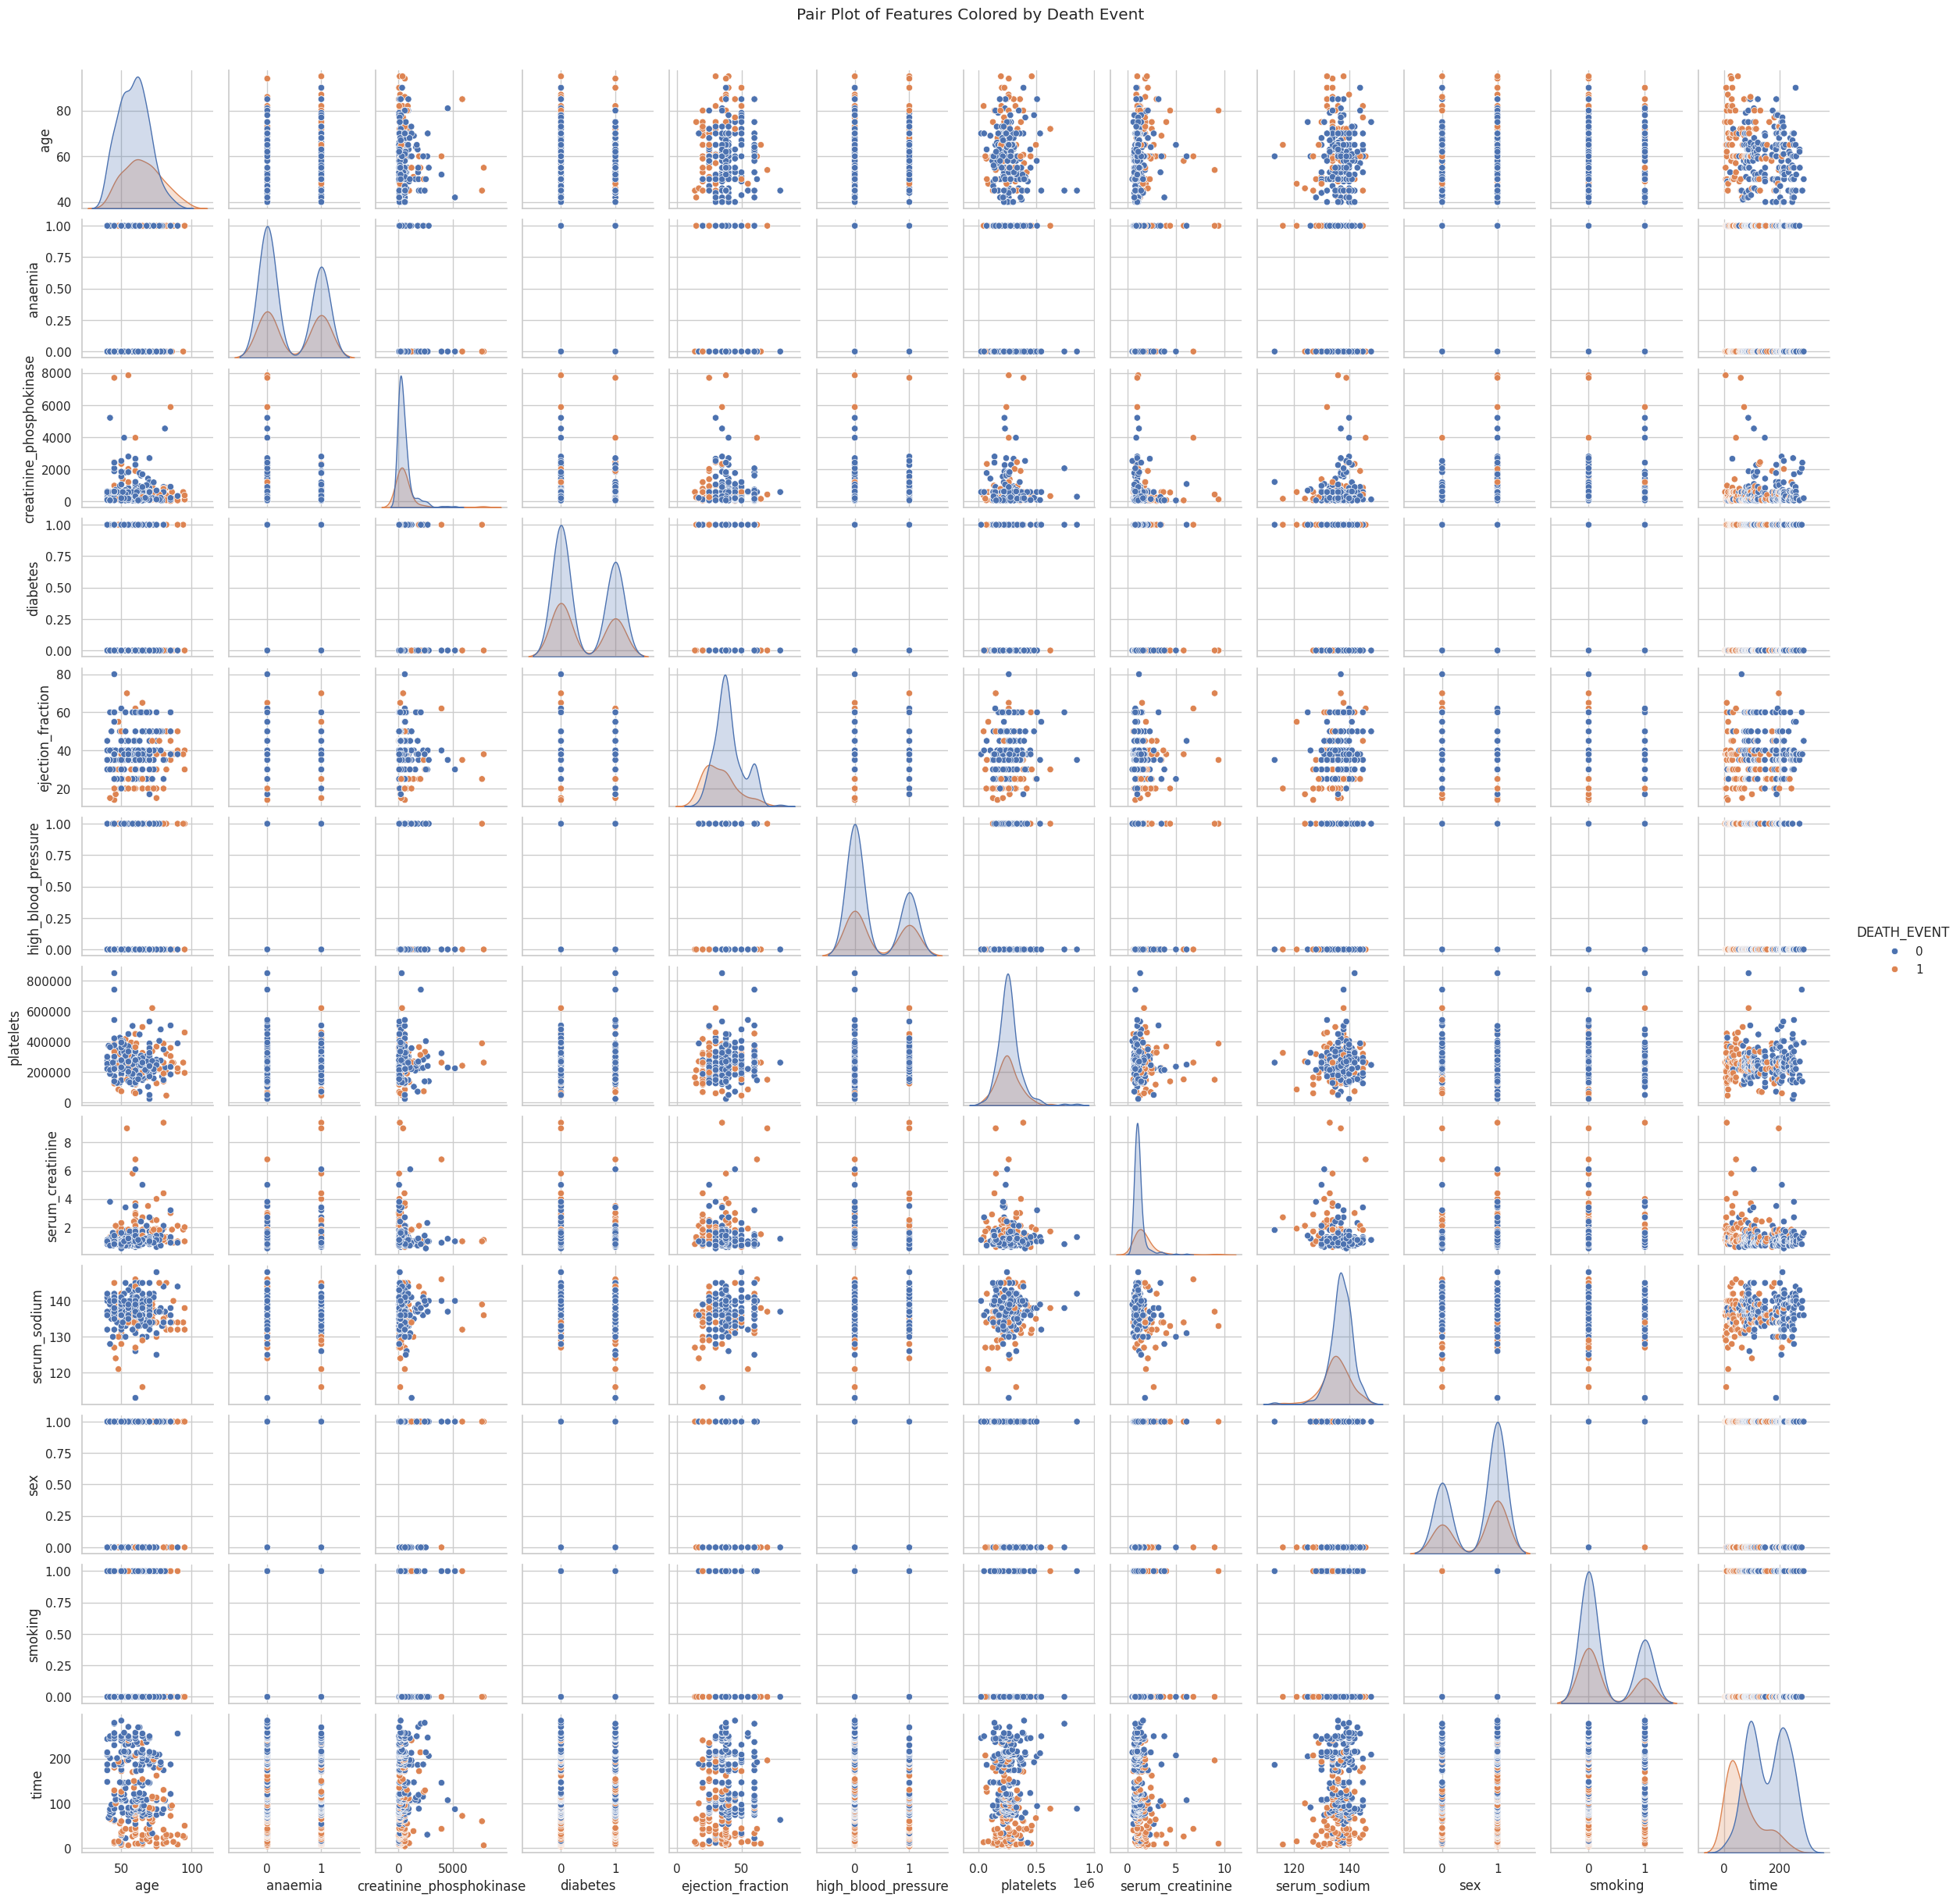

In [25]:
#Pair Plot
#A pair plot can visualize the relationships between multiple features.
# Create a pairplot
sns.pairplot(data, hue='DEATH_EVENT', diag_kind='kde', height=2)
plt.suptitle('Pair Plot of Features Colored by Death Event', y=1.02)
plt.show()

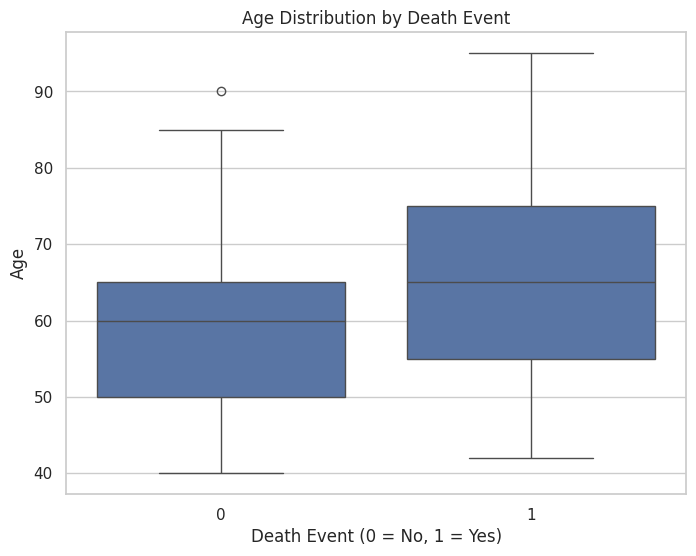

In [26]:
#Box Plot
#A box plot can show the distribution of a numerical variable across different categories.
# Box plot for 'age' against 'DEATH_EVENT'
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='age', data=data)
plt.title('Age Distribution by Death Event')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

In [27]:
# Step 7: Save the Model
#with open('model.pkl', 'wb') as file:
#   pickle.dump(model, file)

#print("Model saved as model.pkl")

In [30]:
# model_creator.py

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load dataset
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Prepare data
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(model, "final_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.
